## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE','TAG','POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head(5)

DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    506
4  2008-08-01 00:00:00       c++    164

In [4]:
df.tail(5)

DATE     TAG  POSTS
2295  2022-05-01 00:00:00     php   4549
2296  2022-05-01 00:00:00  python  25005
2297  2022-05-01 00:00:00       r   4996
2298  2022-05-01 00:00:00    ruby    520
2299  2022-05-01 00:00:00   swift   1890

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2300, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2300
TAG      2300
POSTS    2300
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
count_posts_by_tag = df.groupby('TAG').sum()
count_posts_by_tag.sort_values('POSTS', ascending=False)

POSTS
TAG                
javascript  2377644
python      1954435
java        1846039
c#          1539155
php         1435999
c++          765491
r            450067
c            379924
swift        313155
ruby         224222
perl          66724
go            61653
delphi        49617
assembly      40413

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

DATE  POSTS
TAG                    
assembly     166    166
c            166    166
c#           167    167
c++          166    166
delphi       166    166
go           151    151
java         166    166
javascript   166    166
perl         166    166
php          166    166
python       166    166
r            164    164
ruby         166    166
swift        158    158

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
date_string = df.DATE[1]
pd.to_datetime(date_string)

Timestamp('2008-08-01 00:00:00')

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [11]:
df.head(3)

DATE       TAG  POSTS
0 2008-07-01        c#      3
1 2008-08-01  assembly      8
2 2008-08-01         c     83

## Data Manipulation

Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

In [12]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG         assembly       c      c#     c++  delphi     go    java  \
DATE                                                                  
2008-07-01       NaN     NaN     3.0     NaN     NaN    NaN     NaN   
2008-08-01       8.0    83.0   506.0   164.0    14.0    NaN   222.0   
2008-09-01      28.0   318.0  1648.0   753.0   104.0    NaN  1133.0   
2008-10-01      15.0   303.0  1989.0   809.0   112.0    NaN  1151.0   
2008-11-01      17.0   259.0  1732.0   734.0   141.0    NaN   957.0   
...              ...     ...     ...     ...     ...    ...     ...   
2022-01-01     240.0  2062.0  5907.0  3884.0   151.0  791.0  7697.0   
2022-02-01     225.0  1790.0  5837.0  3484.0   187.0  688.0  7281.0   
2022-03-01     254.0  2104.0  6496.0  3851.0   134.0  832.0  8141.0   
2022-04-01     268.0  1884.0  5978.0  3872.0   121.0  759.0  7901.0   
2022-05-01     323.0  2035.0  6683.0  4258.0   142.0  778.0  8473.0   

TAG         javascript   perl     php   python       r   ruby   swift  
DATE                                                                   
2008-07-01         NaN    NaN     NaN      NaN     NaN    NaN     NaN  
2008-08-01       164.0   28.0   159.0    120.0     NaN   70.0     NaN  
2008-09-01       637.0  130.0   477.0    537.0     6.0  287.0     NaN  
2008-10-01       724.0  127.0   612.0    508.0     NaN  247.0     NaN  
2008-11-01       580.0   97.0   502.0    452.0     1.0  159.0     NaN  
...                ...    ...     ...      ...     ...    ...     ...  
2022-01-01     16248.0  131.0  4002.0  22591.0  4248.0  477.0  1988.0  
2022-02-01     15467.0   97.0  3728.0  22664.0  4342.0  456.0  1884.0  
2022-03-01     16379.0  105.0  3776.0  24635.0  5092.0  529.0  2085.0  
2022-04-01     16075.0  101.0  3844.0  23728.0  4790.0  495.0  1783.0  
2022-05-01     17189.0  101.0  4549.0  25005.0  4996.0  520.0  1890.0  

[167 rows x 14 columns]

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
reshaped_df.shape

(167, 14)

In [14]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [15]:
reshaped_df.head(5)

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   506.0  164.0    14.0 NaN   222.0       164.0   
2008-09-01      28.0  318.0  1648.0  753.0   104.0 NaN  1133.0       637.0   
2008-10-01      15.0  303.0  1989.0  809.0   112.0 NaN  1151.0       724.0   
2008-11-01      17.0  259.0  1732.0  734.0   141.0 NaN   957.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  159.0   120.0  NaN   70.0    NaN  
2008-09-01  130.0  477.0   537.0  6.0  287.0    NaN  
2008-10-01  127.0  612.0   508.0  NaN  247.0    NaN  
2008-11-01   97.0  502.0   452.0  1.0  159.0    NaN

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
reshaped_df.count()

TAG
assembly      166
c             166
c#            167
c++           166
delphi        166
go            151
java          166
javascript    166
perl          166
php           166
python        166
r             164
ruby          166
swift         158
dtype: int64

In [17]:
# we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame
reshaped_df.isna().values.any()

True

In [18]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG         assembly       c      c#     c++  delphi     go    java  \
DATE                                                                  
2008-07-01       0.0     0.0     3.0     0.0     0.0    0.0     0.0   
2008-08-01       8.0    83.0   506.0   164.0    14.0    0.0   222.0   
2008-09-01      28.0   318.0  1648.0   753.0   104.0    0.0  1133.0   
2008-10-01      15.0   303.0  1989.0   809.0   112.0    0.0  1151.0   
2008-11-01      17.0   259.0  1732.0   734.0   141.0    0.0   957.0   
...              ...     ...     ...     ...     ...    ...     ...   
2022-01-01     240.0  2062.0  5907.0  3884.0   151.0  791.0  7697.0   
2022-02-01     225.0  1790.0  5837.0  3484.0   187.0  688.0  7281.0   
2022-03-01     254.0  2104.0  6496.0  3851.0   134.0  832.0  8141.0   
2022-04-01     268.0  1884.0  5978.0  3872.0   121.0  759.0  7901.0   
2022-05-01     323.0  2035.0  6683.0  4258.0   142.0  778.0  8473.0   

TAG         javascript   perl     php   python       r   ruby   swift  
DATE                                                                   
2008-07-01         0.0    0.0     0.0      0.0     0.0    0.0     0.0  
2008-08-01       164.0   28.0   159.0    120.0     0.0   70.0     0.0  
2008-09-01       637.0  130.0   477.0    537.0     6.0  287.0     0.0  
2008-10-01       724.0  127.0   612.0    508.0     0.0  247.0     0.0  
2008-11-01       580.0   97.0   502.0    452.0     1.0  159.0     0.0  
...                ...    ...     ...      ...     ...    ...     ...  
2022-01-01     16248.0  131.0  4002.0  22591.0  4248.0  477.0  1988.0  
2022-02-01     15467.0   97.0  3728.0  22664.0  4342.0  456.0  1884.0  
2022-03-01     16379.0  105.0  3776.0  24635.0  5092.0  529.0  2085.0  
2022-04-01     16075.0  101.0  3844.0  23728.0  4790.0  495.0  1783.0  
2022-05-01     17189.0  101.0  4549.0  25005.0  4996.0  520.0  1890.0  

[167 rows x 14 columns]

In [19]:
# recheck if any NaN present in records (/values)
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

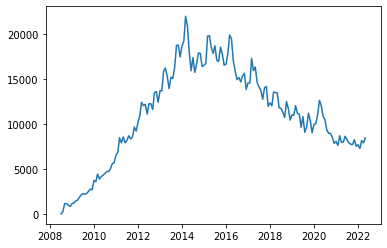

In [21]:
plt.plot(reshaped_df.index, reshaped_df.java)

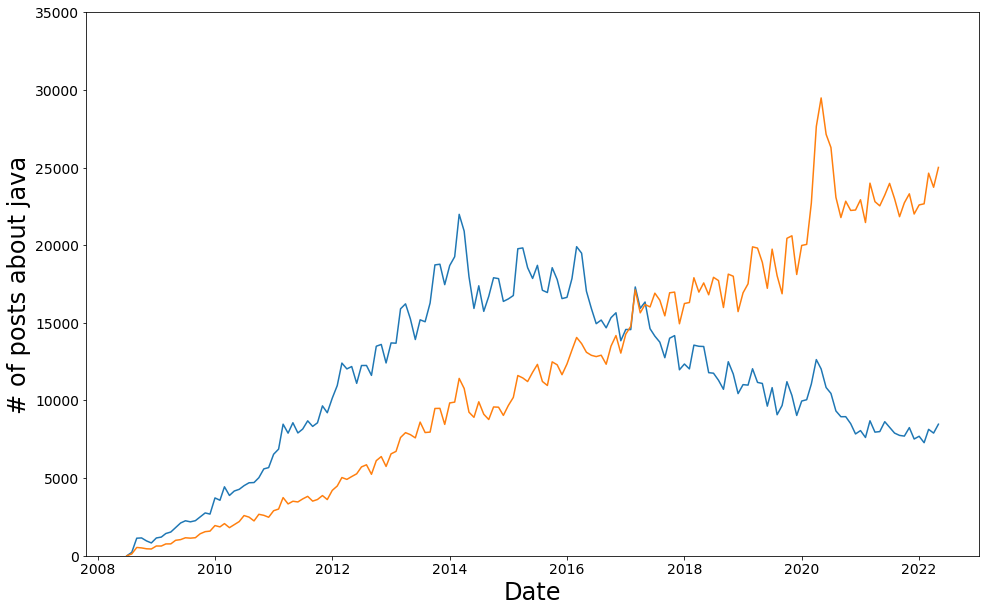

In [28]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=24)
plt.ylabel('# of posts about java', fontsize=24)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


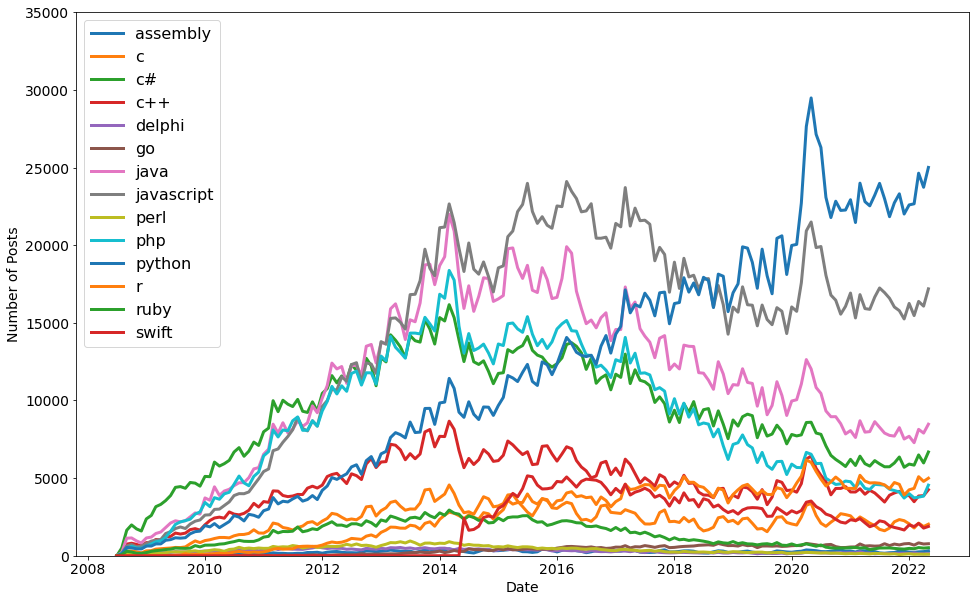

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.legend(fontsize=16)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

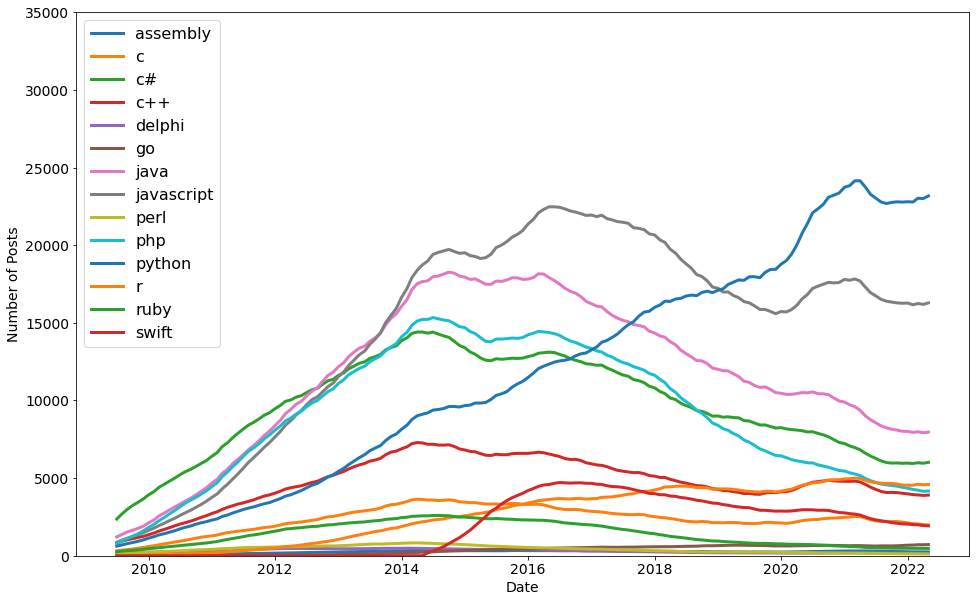

In [40]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=13).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)